Here I will build a regression model to predict the popularity of the phone

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('../clean_phones/clean_phones.csv')
df['battery_type'] = df['battery_type'].fillna('Li-Po')
df = df[df['type'] == 'phone']

In [75]:
df.columns

Index(['brand', 'model', 'photo_link', 'phone_link', 'popularity_become_fan',
       'popularity_views', 'popularity_views_today', 'price', 'eSIM',
       'announce_year', 'available', 'release_year', 'cancelled', 'height_mm',
       'length_mm', 'width_mm', 'weight_g', 'ip_rating', 'screen_type',
       'screen_hz', 'screen_size', 'screen_to_body', 'screen_resolution_x',
       'screen_resolution_y', 'chipset_nm', 'chipset_cores',
       'memory_card_slot', 'internal_rom_gb', 'internal_ram_gb', 'camera_mp',
       'camera_f', 'camera_video_resolution', 'camera_video_fps',
       'selfie_camera_mp', 'selfie_camera_f', 'selfie_camera_video_resolution',
       'selfie_camera_video_fps', '35mm_jack', 'wifi_model',
       'bluetooth_version', 'nfc', 'radio', 'usb_type', 'usb_version',
       'biometric_auth', 'has_black_color', 'foldable', 'battery_type',
       'battery_capacity', 'type', '5g'],
      dtype='object')

From the features above, features such as `photo_link`, `phone_link`, `popularity_views`, `popularity_views_today` will be removed and the target variable is `popularity_become_fan`. The features `popularity_views` and `popularity_views_today` are removed because they too closely follow the target feature.

Now I will build a baseline model and try to improve it's predictions as I go over different models and features.

In [76]:
features = ['brand', 'model', #'popularity_become_fan', <-- the target feature
       'price', 'eSIM',
       'announce_year', 'available', 'release_year', 'cancelled', 'height_mm',
       'length_mm', 'width_mm', 'weight_g', 'ip_rating', 'screen_type',
       'screen_hz', 'screen_size', 'screen_to_body', 'screen_resolution_x',
       'screen_resolution_y', 'chipset_nm', 'chipset_cores',
       'memory_card_slot', 'internal_rom_gb', 'internal_ram_gb', 'camera_mp',
       'camera_f', 'camera_video_resolution', 'camera_video_fps',
       'selfie_camera_mp', 'selfie_camera_f', 'selfie_camera_video_resolution',
       'selfie_camera_video_fps', '35mm_jack', 'wifi_model',
       'bluetooth_version', 'nfc', 'radio', 'usb_type', 'usb_version',
       'biometric_auth', 'has_black_color', 'foldable', 'battery_type',
       'battery_capacity', 'type', '5g']

In [77]:
num_features = ['price', 'eSIM', 'release_year', 'height_mm',
       'length_mm', 'width_mm', 'weight_g', 'screen_hz', 'screen_size', 'screen_to_body', 'screen_resolution_x',
       'screen_resolution_y', 'chipset_nm', 'memory_card_slot', 'internal_rom_gb', 'internal_ram_gb', 'camera_mp',
       'camera_f', 'camera_video_fps',
       'selfie_camera_mp', 'selfie_camera_f', 'selfie_camera_video_fps', '35mm_jack',
       'bluetooth_version', 'nfc', 'radio', 'usb_version',
       'biometric_auth', 'has_black_color', 'foldable', 'battery_capacity', '5g']

cat_features = ['brand', 'ip_rating', 'screen_type', 'chipset_cores', 'camera_video_resolution',
                'selfie_camera_video_resolution', 'usb_type', 'wifi_model', 'battery_type']

In [78]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [79]:
column_transformer = ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
])

In [80]:
ridge_model = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('classifier', Ridge(random_state=42))
])

In [81]:
X = df[num_features + cat_features]
y = df['popularity_become_fan']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['price', 'eSIM',
                                                   'release_year', 'height_mm',
                                                   'length_mm', 'width_mm',
                                                   'weight_g', 'screen_hz',
                                                   'screen_size',
                                                   'screen_to_body',
                                                   'screen_resolution_x',
                                                   'screen_resolution_y',
                                                   'chipset_nm',
                                                   'memory_card_slot',
                                                   'internal_rom_gb',
                                                   'internal_ram_gb',
                                                   '...
                                                   'bluetooth_version', 'nfc',
                                                   'radio', 'usb_version',
                                                   'biometric_auth',
                                                   'has_black_color',
                                                   'foldable', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['brand', 'ip_rating',
                                                   'screen_type',
                                                   'chipset_cores',
                                                   'camera_video_resolution',
                                                   'selfie_camera_video_resolution',
                                                   'usb_type', 'wifi_model',
                                                   'battery_type'])])),
                ('classifier', Ridge(random_state=42))])

In [84]:
predictions = ridge_model.predict(X_test)

In [85]:
mean_absolute_error(y_test, predictions)

62.50706712501284

As can be seen the baseline model has mean absolute error (mae) of 62.5.

In [86]:
y.describe()

count    3112.000000
mean       87.612789
std       161.489971
min         0.000000
25%        10.000000
50%        30.000000
75%        93.000000
max      1906.000000
Name: popularity_become_fan, dtype: float64

Given the standard deviation of the likes to be 161, this model does the job well. But we can do better.

Now I will apply random forests model to the same features and see the result.

In [87]:
rf_model = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('classifier', RandomForestRegressor(random_state=42,  n_jobs=-1))
])

rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)

mean_absolute_error(y_test, predictions)

50.6457632423756

With random forests model the mae is lower.

By feature engineering I hope to further improve the accuracy of the model.

In [88]:
df['chipset_cores'].unique() # get all values of number of cores

array(['Quad-core', 'Octa-core', 'Hexa-core', 'Single-core', 'Dual-core',
       'Nona-core', 'INTQuad-core', '8-core', '7-core', '10-core'],
      dtype=object)

In [89]:
processor_mapping = {
    'Single-core': 1,
    'Dual-core': 2,
    'Quad-core': 4,
    'Hexa-core': 6,
    'Octa-core': 8,
    'Nona-core': 9,
    '10-core': 10,
    '8-core': 8,
    '7-core': 7,
    'INTQuad-core': 4  # Assuming INTQuad-core is treated as Quad-core
}

df['n_cores'] = df['chipset_cores'].replace(processor_mapping) # make number of cores numeric

/tmp/ipykernel_99639/2069591592.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['n_cores'] = df['chipset_cores'].replace(processor_mapping) # make number of cores numeric


In [90]:
df['phone_age'] = 2025-df['release_year'] # Phone age as current year - release year. Might be more descriptive.

df['phone_volume'] = df['height_mm']*df['length_mm']*df['width_mm'] # Combine 3 size metrics into one metric.

df['phone_volume_per_gram'] = (df['height_mm']*df['length_mm']*df['width_mm'])/df['weight_g'] # Combine 3 size metrics and a weight metric into one metric.

df['is_water_resistant'] = ~df['ip_rating'].str.contains('IPXX') # Make IP resistance a boolean

df['gb_per_euro'] = (df['internal_ram_gb']*df['internal_rom_gb'])/df['price']

df['camera_mpf'] = df['camera_mp']*df['camera_f']

df['selfie_camera_mpf'] = df['selfie_camera_mp']*df['selfie_camera_f']

df['total_pixels'] = df['screen_resolution_x']*df['screen_resolution_y']

df['total_pixels_per_inch'] = df['screen_resolution_x']*df['screen_resolution_y']/df['screen_size']
df['total_pixels_per_hz'] = df['screen_resolution_x']*df['screen_resolution_y']/df['screen_hz']

df['battery_capacity_per_g'] = df['battery_capacity']/df['weight_g']

df['chipset_cores_nm'] = df['n_cores']*df['chipset_nm']

In [91]:
df['camera_video_resolution'].unique()

array(['1080p', '720p', '480p', '4K', '8K', '1440p', 'Yes', 'No', 'cif',
       '6K', '1152p', 'QVGA'], dtype=object)

In [92]:
resolution_mapping = {
    'QVGA': 0,
    'Yes': 0,
    'cif': 1,
    '480p': 2,
    '720p': 3,
    '1080p': 4,
    '1152p': 5,
    '1440p': 6,
    '4K': 7,
    '6K': 8,
    '8K': 9,
    'No': -1
}

df['camera_video_resolution_ordinal'] = df['camera_video_resolution'].replace(resolution_mapping)

/tmp/ipykernel_99639/1587475564.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['camera_video_resolution_ordinal'] = df['camera_video_resolution'].replace(resolution_mapping)


In [98]:
num_features = ['price', 'eSIM', 'screen_hz','phone_age',
       'phone_volume_per_gram', 'screen_size', 'screen_to_body', 'screen_resolution_x',
       'screen_resolution_y', 'total_pixels_per_hz', 'chipset_nm', 'n_cores', 'gb_per_euro', 'camera_mp',
       'camera_f', 'camera_video_fps', 'camera_mpf',
       'selfie_camera_video_fps', '35mm_jack',
       'nfc', 'radio', 'usb_version',
       'biometric_auth', 'has_black_color', 'foldable', 'battery_capacity', '5g']

cat_features = ['brand', 'screen_type', 'camera_video_resolution',
                'selfie_camera_video_resolution', 'usb_type', 'wifi_model', 'battery_type']

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
column_transformer = ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
])

X = df[num_features + cat_features]
y = df['popularity_become_fan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
rf_model = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('classifier', RandomForestRegressor(random_state=42, n_estimators=1000, n_jobs=-1))
])

rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)

mean_absolute_error(y_test, predictions)

45.81222937017504

By creating new features, removing some of the features that were irrelevant, and using more estimators, the model mae has become lower by 4.88. The model slightly improved.

In [95]:
importances = rf_model.named_steps['classifier'].feature_importances_
feature_names = rf_model.named_steps['preprocessor'].get_feature_names_out()
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

I will plot top 10 most important and top 10 least important features for the model

<Axes: title={'center': 'Top 10 most important features'}, xlabel='Feature', ylabel='Importance'>

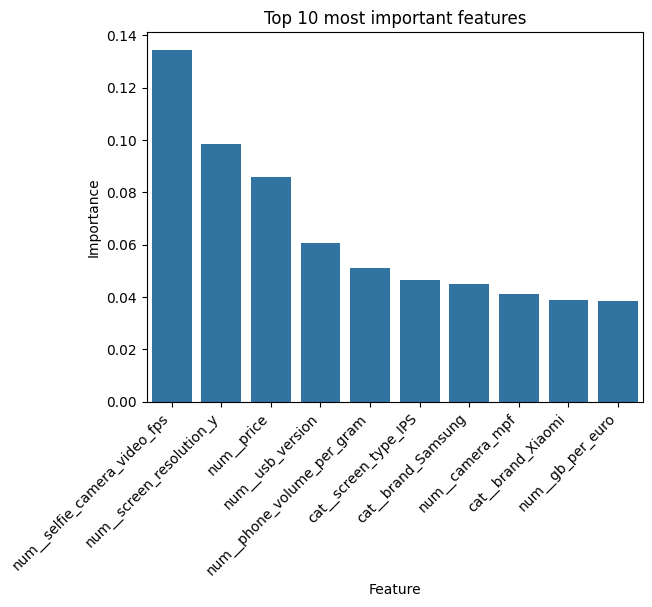

In [96]:
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 most important features')
sns.barplot(feature_importance_df.head(10), x='Feature', y='Importance')

<Axes: title={'center': 'Top 10 least important features'}, xlabel='Feature', ylabel='Importance'>

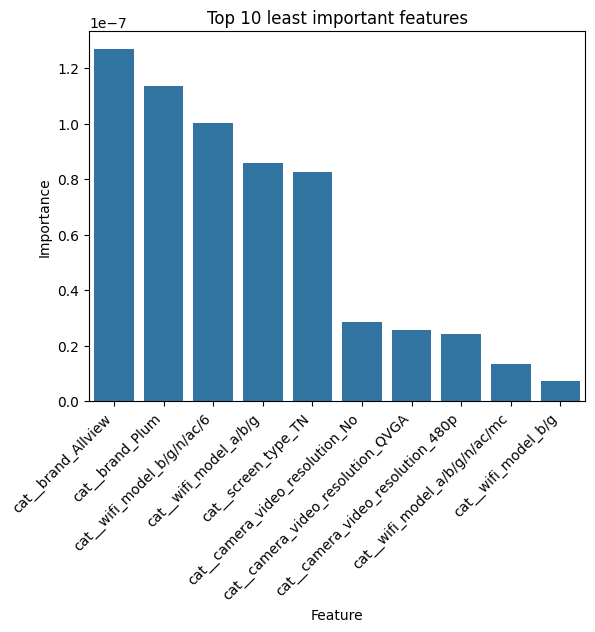

In [97]:
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 least important features')
sns.barplot(feature_importance_df.tail(10), x='Feature', y='Importance')

Based on the plots above, the most important features are the resolution of the phone, price of the phone, and fps of the selfie camera (which seems strange). Additionally, the IPS screen and the density of the phone influence the importance. Brands such as Samsung and Xiaomi help the model predict the popularity more accurately.

On the other hand, the wifi models, brands such as Sonim, Allview, and Plum, along with the low video resolutions of a camera influence the popularity of the phone the least.